# Automobile Case Study

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

**Specific Notes:**<br>
Take only car company name as input for independent variable.

## Reading and Understanding the data :

In [267]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

In [269]:
car_data = pd.read_csv("CarPrice_Assignment.csv")
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Explaining the meaning of varibles in the dataset :**<br><br>
1.Car_ID:Unique id of each observation (Integer)<br>
2.Symboling :Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) <br>
3.carCompany:Name of car company (Categorical)<br>
4.fueltype:Car fuel type i.e gas or diesel (Categorical)<br>
5.aspiration:Aspiration used in a car (Categorical)<br>
6.doornumber:Number of doors in a car (Categorical)<br>
7.carbody:body of car (Categorical)<br>
8.drivewheel:type of drive wheel (Categorical)<br>
9.enginelocation:Location of car engine (Categorical)<br>
10.wheelbase:Weelbase of car (Numeric)<br>
11.carlength:Length of car (Numeric)<br>
12.carwidth:Width of car (Numeric)<br>
13.carheight:height of car (Numeric)<br>
14.curbweight:The weight of a car without occupants or baggage. (Numeric)<br>
15.enginetype:Type of engine. (Categorical)<br>
16.cylindernumber:cylinder placed in the car (Categorical)<br>
17.enginesize:Size of car (Numeric)<br>
18.fuelsystem:Fuel system of car (Categorical)<br>
19.boreratio:Boreratio of car (Numeric)<br>
20.stroke:Stroke or volume inside the engine (Numeric)<br>
21.compressionratio:compression ratio of car (Numeric)<br>
22.horsepower:Horsepower (Numeric)<br>
23.peakrpm:car peak rpm (Numeric)<br>
24.citympg:Mileage in city (Numeric)<br>
25.highwaympg:Mileage on highway (Numeric)<br>
26.price(Dependent variable):Price of car (Numeric)<br>

In [270]:
# get information on the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [271]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [272]:
car_data.shape

(205, 26)

In [273]:
# Drop duplicate rows if there are any
car_data = car_data.drop_duplicates()
car_data.shape

(205, 26)

In [274]:
# Check for missing values
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No missing values present for any of the columns.

In [275]:
# Checking number of unique values for each column
car_data.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

## Data Cleansing :

In [276]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [277]:
# Convert all character columns to LOWER-CASE to avoid any case-sensitive inconsistencies and discrepancies
def to_lower(x):
    try:
        return x.lower()
    except:
        return x
car_data = car_data.applymap(to_lower)
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [278]:
## Drop Car_ID columns since 
car_data = car_data.drop('car_ID',axis=1)
car_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [279]:
# Extract company name from carname
car_data['Company'] = car_data['CarName'].apply(lambda x : x.split()[0].lower())
car_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [280]:
car_data['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [281]:
# Correct spellings for car company
car_name_mapping = {'maxda':'mazda', 'porcshce':'porsche', 'toyouta':'toyota', 'vokswagen':'volkswagen','vw':'volkswagen'}
car_data['Company'] = car_data['Company'].replace(car_name_mapping)
car_data['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [282]:
# Drop the carname since it will be no longer required for our model
car_data = car_data.drop('CarName',axis=1)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [283]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

## Exploratory Data Analysis :

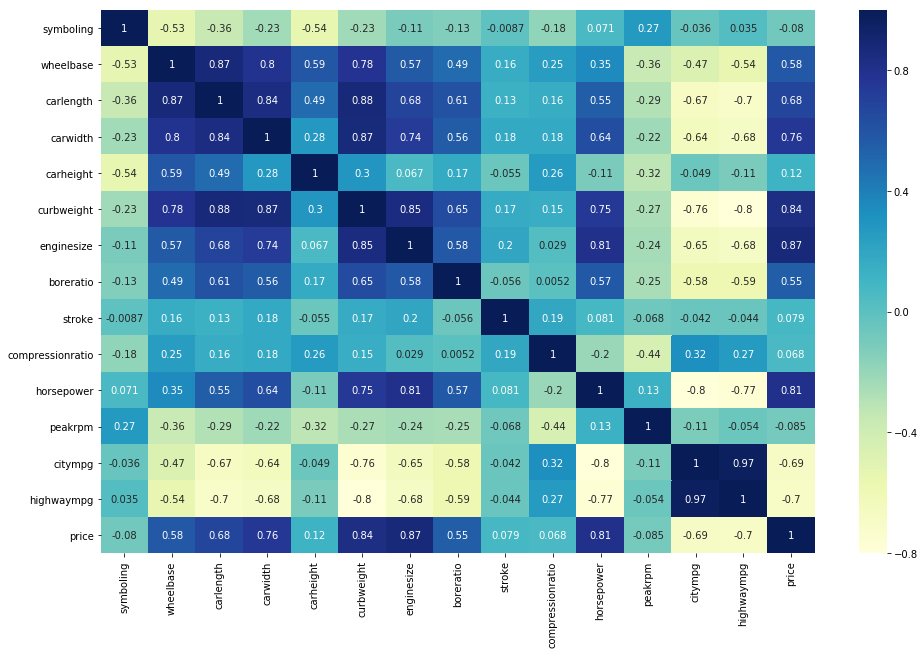

In [284]:
plt.figure(figsize = (16, 10))
sns.heatmap(car_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the heatmap it can be observed that variables like curbweight,enginesize,horsepower,carwidth has strong positive correlation with price. These variables also have strong correlation among them which might lead to multicollinearity.

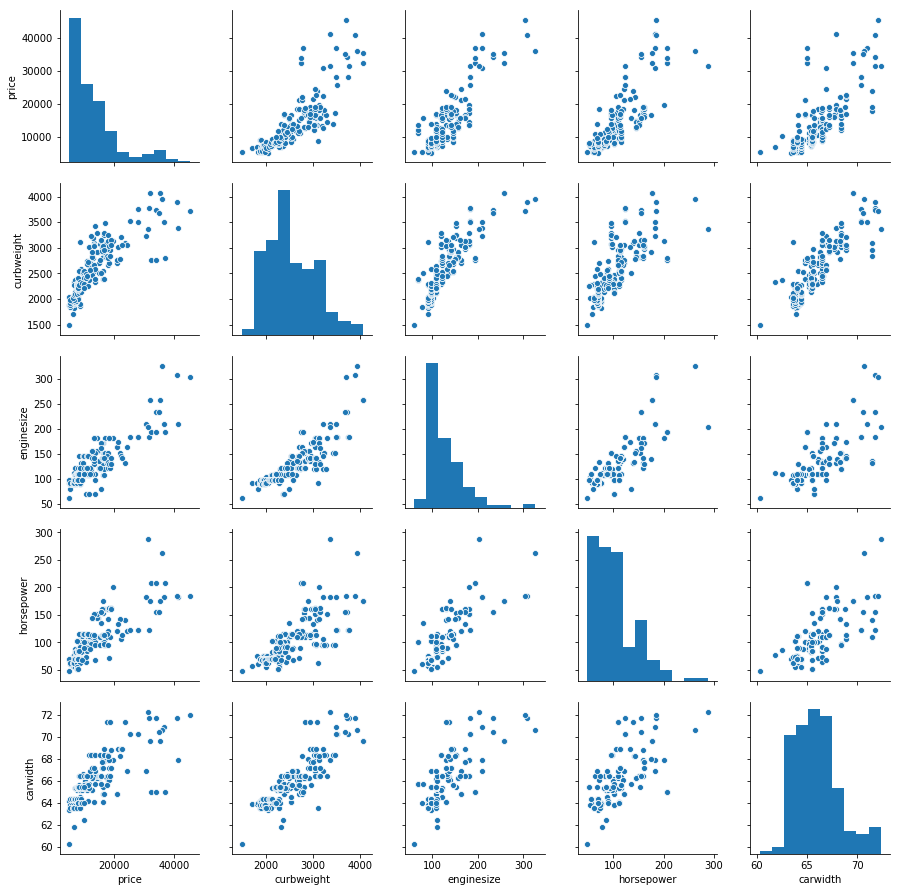

In [285]:
sns.pairplot(car_data[['price','curbweight','enginesize','horsepower','carwidth']])
plt.show()

In [286]:
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


** Visualising Categorical Variables **

In [287]:
car_data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

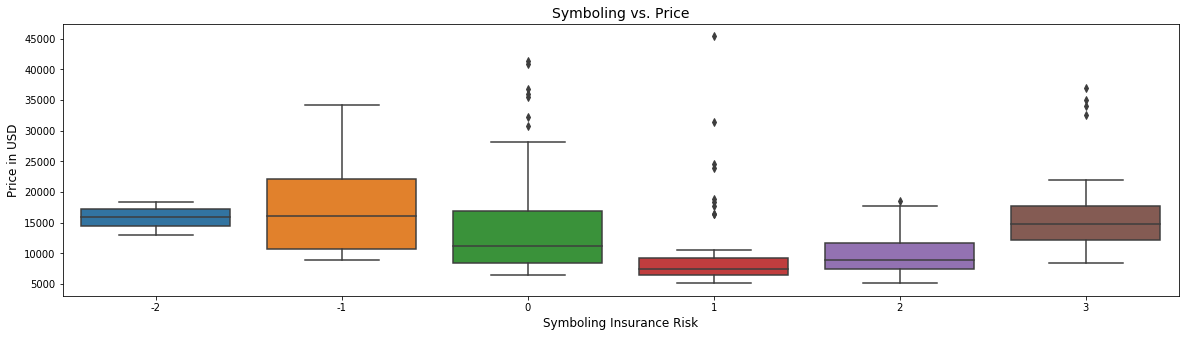

In [288]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_data,x='symboling',y='price')
ax.set_title('Symboling vs. Price',fontsize=14)
ax.set_xlabel('Symboling Insurance Risk',fontsize=12)
ax.set_ylabel('Price in USD',fontsize=12)
plt.show()

It can be seen that there are outliers for symbolic value 0 and -1. The vehicles with the lowest price range [>=75 percentile of the category] have a symboling rating if +1

In [289]:
car_data['Company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: Company, dtype: int64

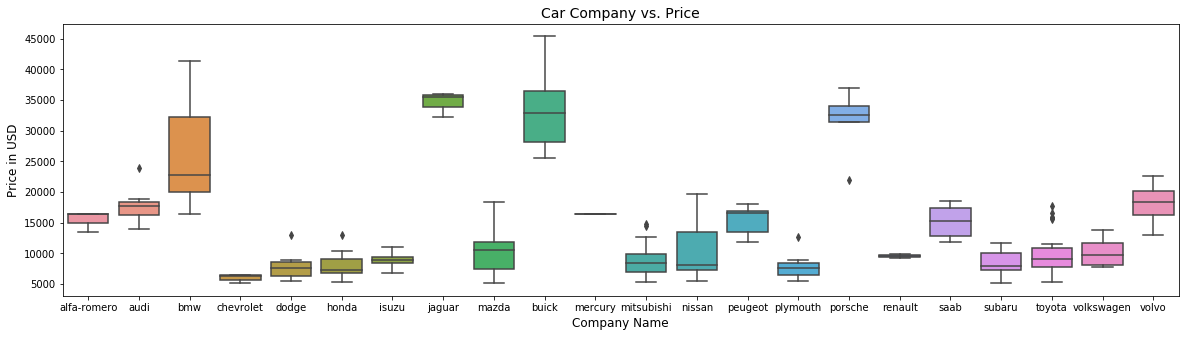

In [290]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_data,x='Company',y='price')
ax.set_title('Car Company vs. Price',fontsize=14)
ax.set_xlabel('Company Name',fontsize=12)
ax.set_ylabel('Price in USD',fontsize=12)
plt.show()

From the price boxplot it is clear that The brands with the most expensive vehicles in the dataset (i.e. >30,000 USD) belong to BUIC, JAGUAR, PORSCHE and BMW.Whereas the lower priced cars belong to CHEVROLET.

In [291]:
car_data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

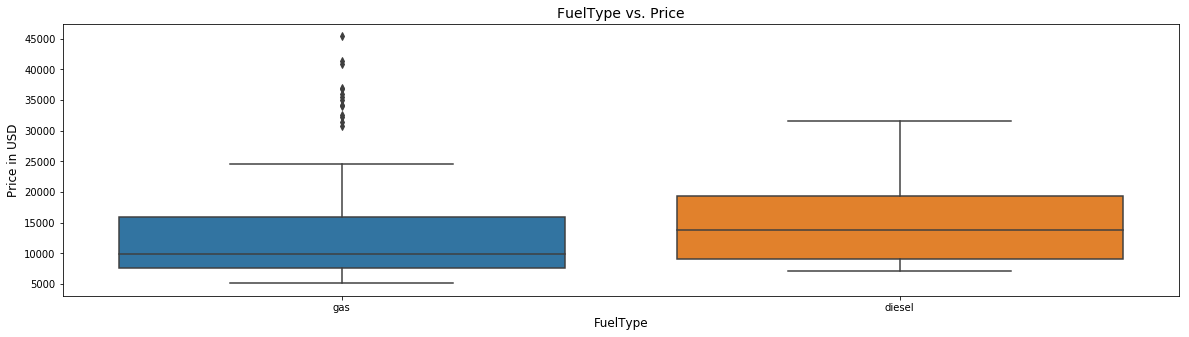

In [292]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_data,x='fueltype',y='price')
ax.set_title('FuelType vs. Price',fontsize=14)
ax.set_xlabel('FuelType',fontsize=12)
ax.set_ylabel('Price in USD',fontsize=12)
plt.show()

The median price of Gasoline vehicles is lower than that of Diesel Vehicles. However,there seems to be some outliers in the price of Gasoline vehicles as there are a few vehicles that are very highly priced.

In [293]:
car_data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

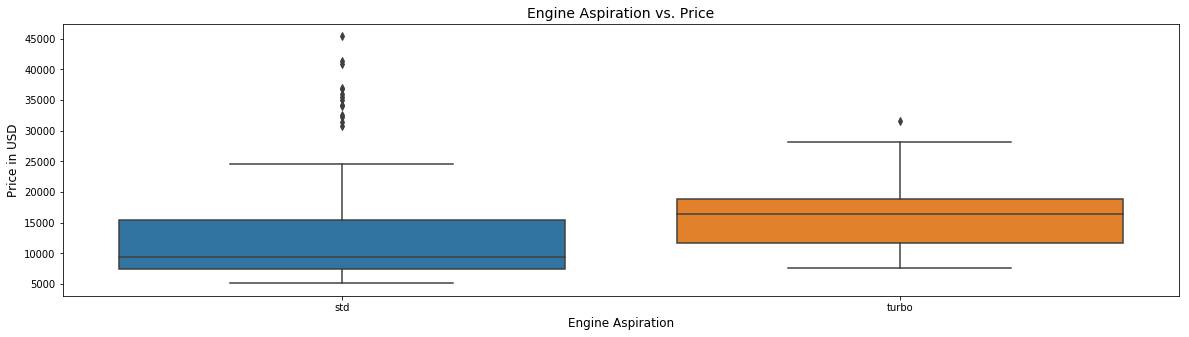

In [294]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_data,x='aspiration',y='price')
ax.set_title('Engine Aspiration vs. Price',fontsize=14)
ax.set_xlabel('Engine Aspiration',fontsize=12)
ax.set_ylabel('Price in USD',fontsize=12)
plt.show()

75th percentile of standard aspirated vehicles have a price lower than the median price of turbo aspirated vehicles.

In [295]:
car_data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

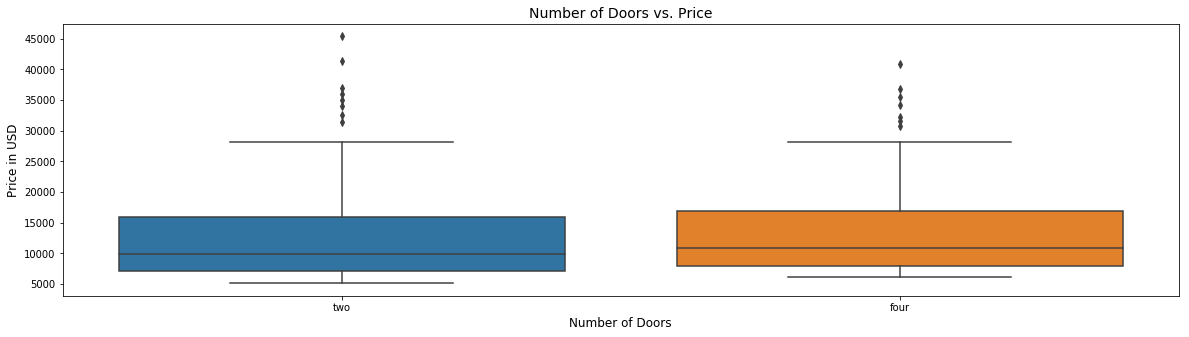

In [296]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_data,x='doornumber',y='price')
ax.set_title('Number of Doors vs. Price',fontsize=14)
ax.set_xlabel('Number of Doors',fontsize=12)
ax.set_ylabel('Price in USD',fontsize=12)
plt.show()

There is almost an equal spread of 2 and 4 doored vehicles in the dataset

In [297]:
car_data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

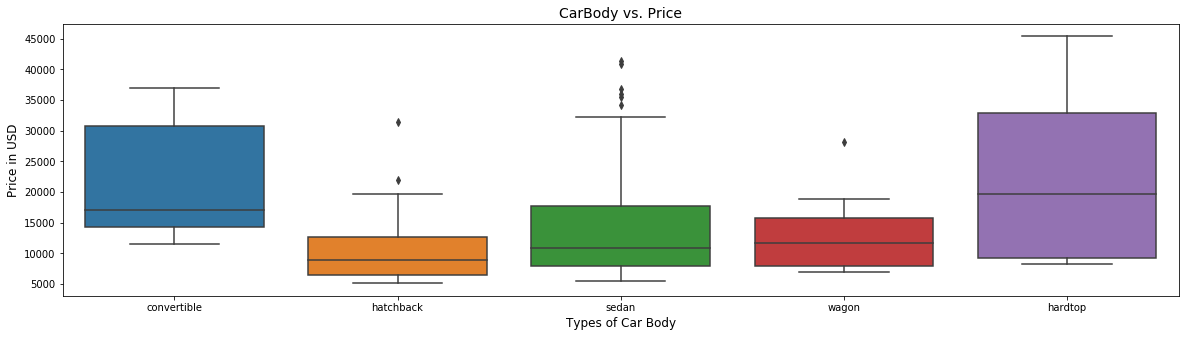

In [298]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_data,x='carbody',y='price')
ax.set_title('CarBody vs. Price',fontsize=14)
ax.set_xlabel('Types of Car Body',fontsize=12)
ax.set_ylabel('Price in USD',fontsize=12)
plt.show()

Hatchback vehicles have the lowest median price of vehicles in the data set whereas hardtop vehicles have the highest median price.

In [299]:
car_data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

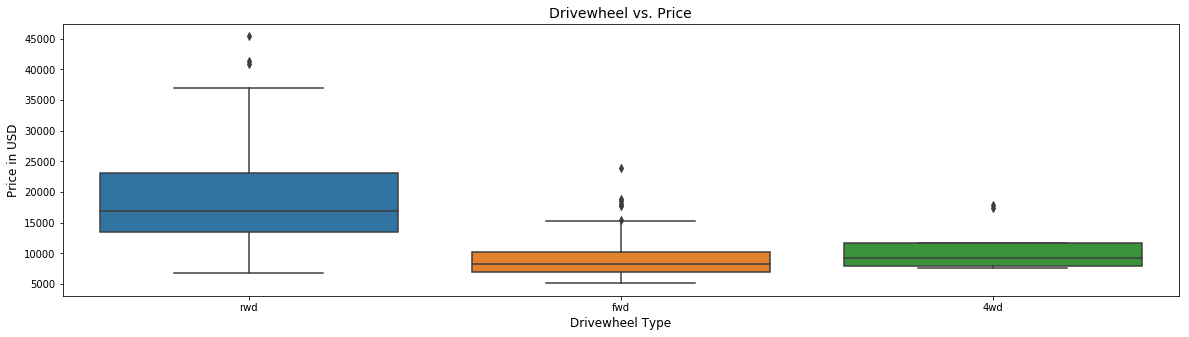

In [300]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_data,x='drivewheel',y='price')
ax.set_title('Drivewheel vs. Price',fontsize=14)
ax.set_xlabel('Drivewheel Type',fontsize=12)
ax.set_ylabel('Price in USD',fontsize=12)
plt.show()

From the above boxplot it is clear that the price of rearwheel drive vehicles (RWD) is significantly higher than the other two drivewheel categories. With Frontwheel drive (FWD) vehicles having the lowest median price.

In [301]:
car_data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

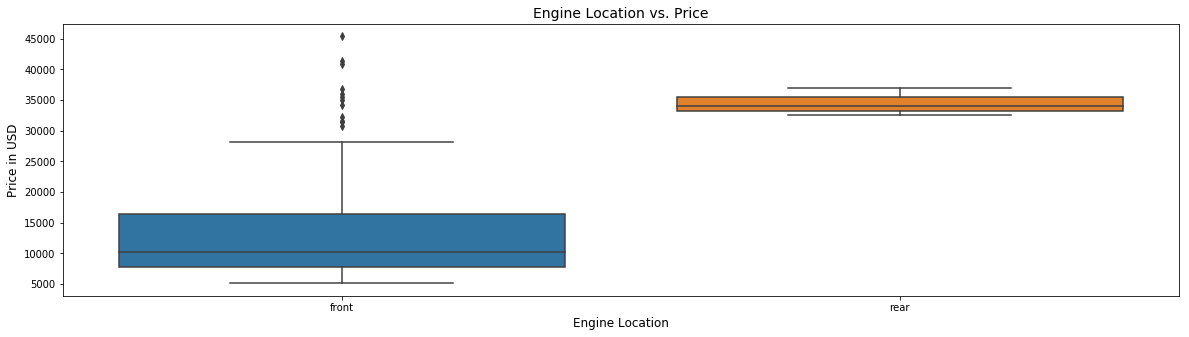

In [302]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_data,x='enginelocation',y='price')
ax.set_title('Engine Location vs. Price',fontsize=14)
ax.set_xlabel('Engine Location',fontsize=12)
ax.set_ylabel('Price in USD',fontsize=12)
plt.show()

From the above boxplot it is clear that the price of vehicles with rear placed engines is significantly higher than the price of vehicles with front placed engines. However the low sample size of rear engined vehicles is a cause for concern.

In [303]:
car_data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

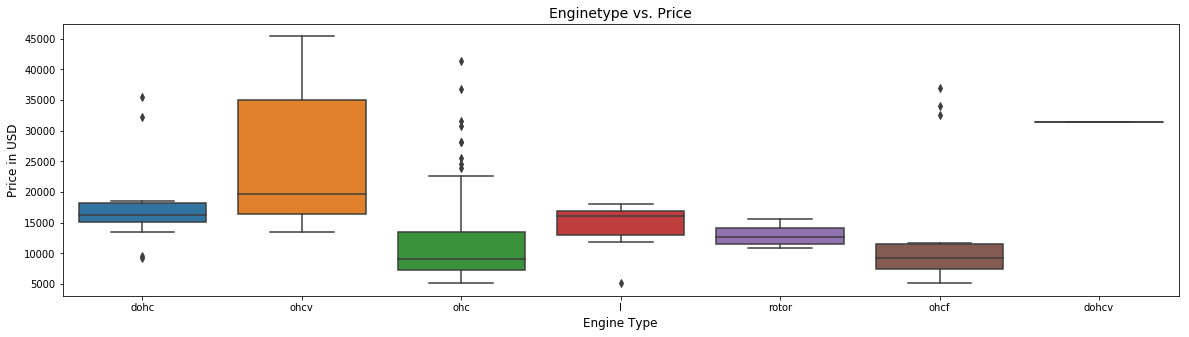

In [304]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_data,x='enginetype',y='price')
ax.set_title('Enginetype vs. Price',fontsize=14)
ax.set_xlabel('Engine Type',fontsize=12)
ax.set_ylabel('Price in USD',fontsize=12)
plt.show()

Vehicles with ohc engine types contributes mostly to the dataset and ohcv engine has the highest price among them

In [305]:
car_data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

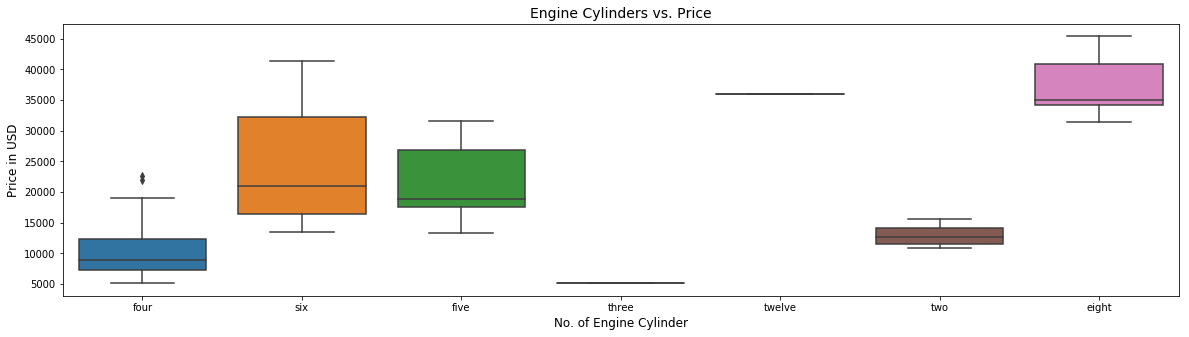

In [306]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_data,x='cylindernumber',y='price')
ax.set_title('Engine Cylinders vs. Price',fontsize=14)
ax.set_xlabel('No. of Engine Cylinder',fontsize=12)
ax.set_ylabel('Price in USD',fontsize=12)
plt.show()

The median cost of eight cylinder vehicles is higher than other cylinder categories.

In [307]:
car_data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

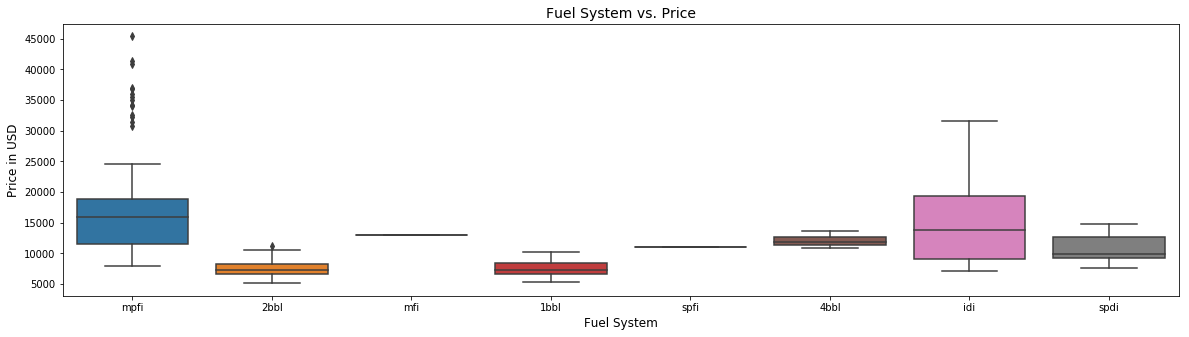

In [308]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=car_data,x='fuelsystem',y='price')
ax.set_title('Fuel System vs. Price',fontsize=14)
ax.set_xlabel('Fuel System',fontsize=12)
ax.set_ylabel('Price in USD',fontsize=12)
plt.show()

From the boxplot it is clear that vehicles Multi-port Fuel Injection [MPFI] have the highest median price. There are also some outliers on the higher price side having MPFI systems.

## Data Preparation :

For the columns having only two unqiue values lets assign binary values 0 and 1 to them and create a new column for each of them.

In [309]:
car_data['fueltype_d'] = np.where(car_data['fueltype'].str.contains('gas'), 1, 0)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,fueltype_d
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1


In [310]:
car_data['aspiration_d'] = np.where(car_data['aspiration'].str.contains('std'), 1, 0)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,fueltype_d,aspiration_d
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,1
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,1


In [311]:
car_data['doornumber_d'] = np.where(car_data['doornumber'].str.contains('two'), 1, 0)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,fueltype_d,aspiration_d,doornumber_d
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1,1
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1,1
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1,1
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,1,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,1,0


In [312]:
car_data['enginelocation_d'] = np.where(car_data['enginelocation'].str.contains('front'), 1, 0)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,fueltype_d,aspiration_d,doornumber_d,enginelocation_d
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1,1,1
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1,1,1
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1,1,1
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,1,0,1
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,1,0,1


In [313]:
car_data.shape

(205, 29)

Let's now create dummy variables for all other categorical columns.

In [314]:
status = pd.get_dummies(car_data['Company'],drop_first = True,prefix='company')
car_data = pd.concat([car_data, status], axis = 1)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,fueltype_d,aspiration_d,doornumber_d,enginelocation_d,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [315]:
status = pd.get_dummies(car_data['symboling'],drop_first=True,prefix='symboling')
car_data = pd.concat([car_data, status], axis = 1)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,fueltype_d,aspiration_d,doornumber_d,enginelocation_d,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [316]:
status = pd.get_dummies(car_data['carbody'],drop_first=True,prefix='carbody')
car_data = pd.concat([car_data, status], axis = 1)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,fueltype_d,aspiration_d,doornumber_d,enginelocation_d,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [317]:
status = pd.get_dummies(car_data['drivewheel'],drop_first=True,prefix='drivewheel')
car_data = pd.concat([car_data, status], axis = 1)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,fueltype_d,aspiration_d,doornumber_d,enginelocation_d,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [318]:
status = pd.get_dummies(car_data['enginetype'],drop_first=True,prefix='enginetype')
car_data = pd.concat([car_data, status], axis = 1)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,fueltype_d,aspiration_d,doornumber_d,enginelocation_d,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [319]:
status = pd.get_dummies(car_data['cylindernumber'],drop_first=True,prefix='cylindernumber')
car_data = pd.concat([car_data, status], axis = 1)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,fueltype_d,aspiration_d,doornumber_d,enginelocation_d,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [320]:
status = pd.get_dummies(car_data['fuelsystem'],drop_first=True,prefix='carfuelsystem')
car_data = pd.concat([car_data, status], axis = 1)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,fueltype_d,aspiration_d,doornumber_d,enginelocation_d,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carfuelsystem_2bbl,carfuelsystem_4bbl,carfuelsystem_idi,carfuelsystem_mfi,carfuelsystem_mpfi,carfuelsystem_spdi,carfuelsystem_spfi
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [321]:
car_data.shape

(205, 80)

In [322]:
# Drop the original columns on which dummies has been created
cols_to_drop = ['Company','symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem','cylindernumber']
car_data = car_data.drop(cols_to_drop,axis=1)
car_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_d,aspiration_d,doornumber_d,enginelocation_d,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carfuelsystem_2bbl,carfuelsystem_4bbl,carfuelsystem_idi,carfuelsystem_mfi,carfuelsystem_mpfi,carfuelsystem_spdi,carfuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [323]:
car_data.shape

(205, 69)

** Check for correlation among different variables after the whole dataset is converted to numerical value **

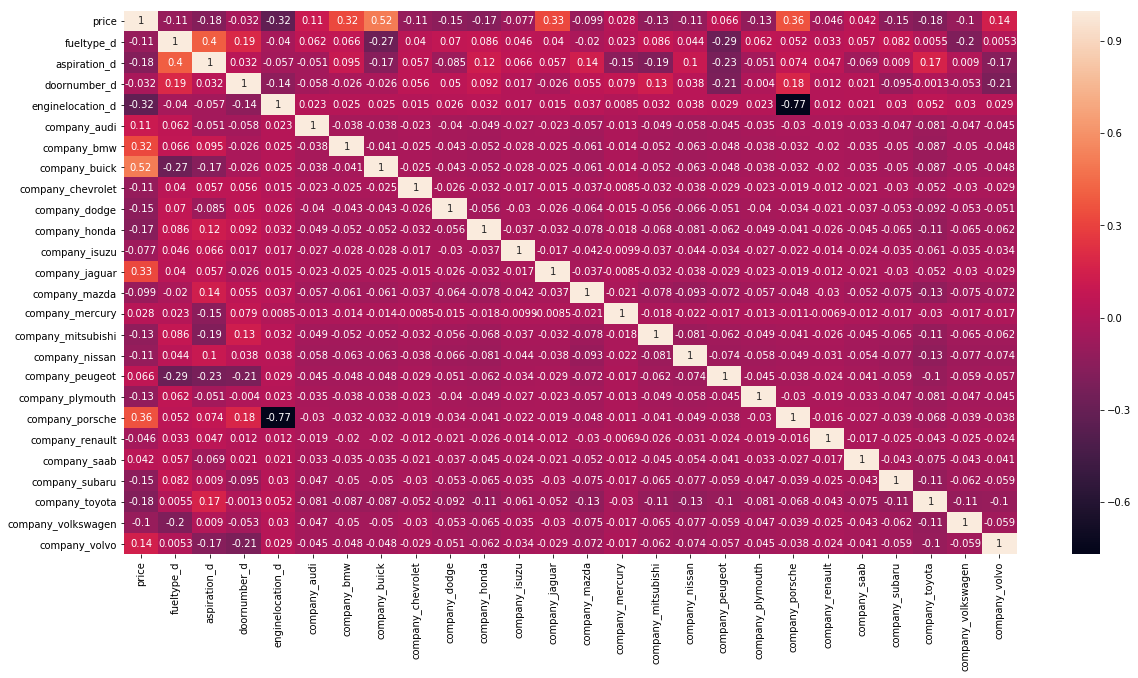

In [324]:
# Since there are lot of columns involved we have divided the plotting into two part for better analysis
plt.figure(figsize = (20, 10))
sns.heatmap(car_data.loc[:,'price':'company_volvo'].corr(), annot = True)
plt.show()

From the above heatmap, it can be seen that variables like company_bmw, company_buick, company_jaguar, company_porsche, enginelocation_d has strong effect on the price of a car.

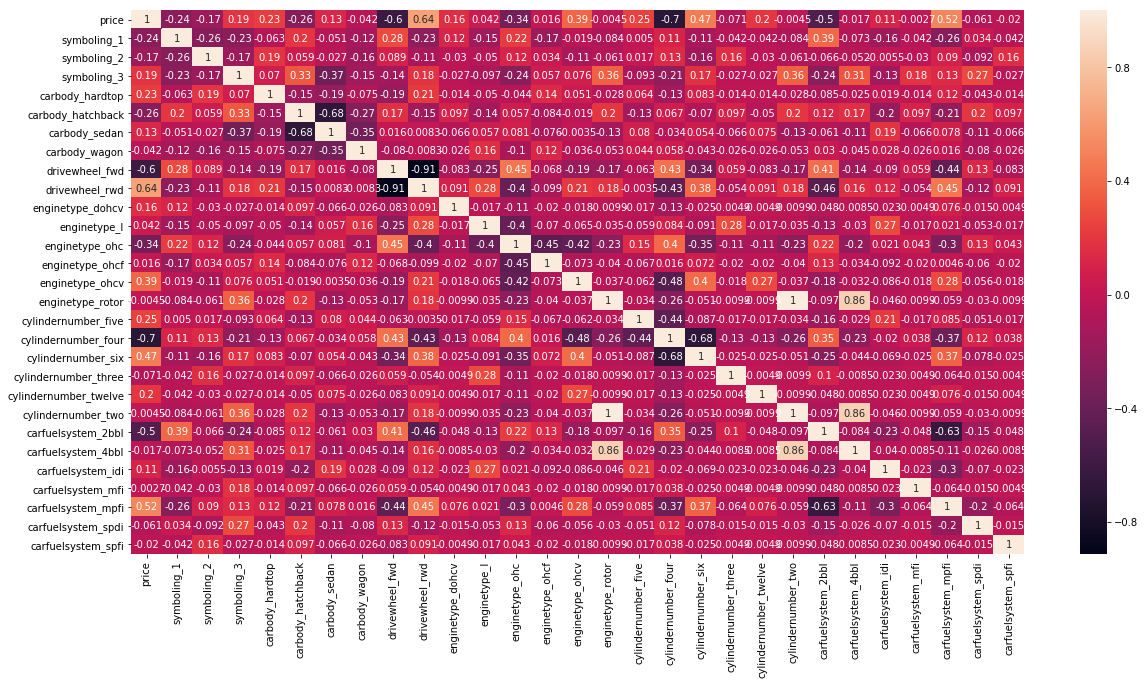

In [325]:
plt.figure(figsize = (20, 10))
sns.heatmap(pd.concat([car_data[['price']],car_data.loc[:,'symboling_1':]],axis=1).corr(), annot = True)
plt.show()

From the above heatmap, it can be seen that variables like drivewheel_fwd/rwd , enginetype_ohcv, cylindernumber_six, carfuelsystem_mpfi etc. has strong effect on the price of a car.

## Model Building :

** Splitting the Data into Training and Testing Sets **

In [326]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [327]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_d,aspiration_d,doornumber_d,enginelocation_d,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carfuelsystem_2bbl,carfuelsystem_4bbl,carfuelsystem_idi,carfuelsystem_mfi,carfuelsystem_mpfi,carfuelsystem_spdi,carfuelsystem_spfi
122,93.7,167.3,63.8,50.8,2191,98,2.97,3.23,9.4,68,5500,31,38,7609.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,94.5,168.9,68.3,50.2,2778,151,3.94,3.11,9.5,143,5500,19,27,22018.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
166,94.5,168.7,64.0,52.6,2300,98,3.24,3.08,9.4,112,6600,26,29,9538.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
199,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22,18950.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [328]:
df_train.shape

(143, 69)

** Scale the data **

In [329]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [330]:
# Apply scaler() to all the columns except the binary and 'dummy' variables
df_train.loc[:,'wheelbase':'price'] = scaler.fit_transform(df_train.loc[:,'wheelbase':'price'])

df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_d,aspiration_d,doornumber_d,enginelocation_d,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carfuelsystem_2bbl,carfuelsystem_4bbl,carfuelsystem_idi,carfuelsystem_mfi,carfuelsystem_mpfi,carfuelsystem_spdi,carfuelsystem_spfi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [331]:
# Divide into X and Y sets for model building
y_train = df_train.pop('price')
X_train = df_train

** Use RFE for automated feature scaling **

In [332]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [333]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [334]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 13),
 ('carlength', False, 19),
 ('carwidth', True, 1),
 ('carheight', False, 15),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 24),
 ('horsepower', False, 8),
 ('peakrpm', False, 10),
 ('citympg', False, 34),
 ('highwaympg', False, 25),
 ('fueltype_d', False, 28),
 ('aspiration_d', False, 12),
 ('doornumber_d', False, 51),
 ('enginelocation_d', True, 1),
 ('company_audi', False, 35),
 ('company_bmw', True, 1),
 ('company_buick', False, 43),
 ('company_chevrolet', False, 22),
 ('company_dodge', False, 17),
 ('company_honda', False, 20),
 ('company_isuzu', False, 44),
 ('company_jaguar', False, 26),
 ('company_mazda', False, 39),
 ('company_mercury', False, 57),
 ('company_mitsubishi', False, 9),
 ('company_nissan', False, 41),
 ('company_peugeot', False, 6),
 ('company_plymouth', False, 16),
 ('company_porsche', True, 1),
 ('company_renault', False, 52),
 ('company_saab', False, 14

In [335]:
# Columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'enginelocation_d',
       'company_bmw', 'company_porsche', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [336]:
# Columns rejected by RFE
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_d',
       'aspiration_d', 'doornumber_d', 'company_audi', 'company_buick',
       'company_chevrolet', 'company_dodge', 'company_honda', 'company_isuzu',
       'company_jaguar', 'company_mazda', 'company_mercury',
       'company_mitsubishi', 'company_nissan', 'company_peugeot',
       'company_plymouth', 'company_renault', 'company_saab', 'company_subaru',
       'company_toyota', 'company_volkswagen', 'company_volvo', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'carfuelsystem_2bbl', '

In [337]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,carwidth,curbweight,enginesize,boreratio,enginelocation_d,company_bmw,company_porsche,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,0.291667,0.272692,0.139623,0.230159,1,0,0,0,0,0
125,0.666667,0.500388,0.339623,1.000000,1,0,1,0,0,0
166,0.308333,0.314973,0.139623,0.444444,1,0,0,0,0,0
1,0.316667,0.411171,0.260377,0.626984,1,0,0,0,0,0
199,0.575000,0.647401,0.260377,0.746032,1,0,0,0,0,0


In [338]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [339]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [340]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.21e-64
Time:                        21:33:58   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [341]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,230.92
2,curbweight,9.26
3,enginesize,7.23
1,carwidth,4.92
4,boreratio,1.85
7,company_porsche,1.82
5,enginelocation_d,1.66
9,cylindernumber_twelve,1.49
10,cylindernumber_two,1.24
6,company_bmw,1.13


Drop column cylindernumber_twelve as it is insignificant due to high p-value.

In [342]:
X = X_train_rfe.drop('cylindernumber_twelve', 1,)
X.head()

,const,carwidth,curbweight,enginesize,boreratio,enginelocation_d,company_bmw,company_porsche,cylindernumber_three,cylindernumber_two
122,1.0,0.291667,0.272692,0.139623,0.230159,1,0,0,0,0
125,1.0,0.666667,0.500388,0.339623,1.000000,1,0,1,0,0
166,1.0,0.308333,0.314973,0.139623,0.444444,1,0,0,0,0
1,1.0,0.316667,0.411171,0.260377,0.626984,1,0,0,0,0
199,1.0,0.575000,0.647401,0.260377,0.746032,1,0,0,0,0


In [343]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.18e-65
Time:                        21:33:59   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1760 

In [344]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,228.54
2,curbweight,8.64
3,enginesize,5.13
1,carwidth,4.91
4,boreratio,1.85
7,company_porsche,1.80
5,enginelocation_d,1.65
9,cylindernumber_two,1.17
6,company_bmw,1.09
8,cylindernumber_three,1.05


Drop column curbweight since it has high VIF value.

In [345]:
X = X.drop('curbweight', 1,)
X.head()

,const,carwidth,enginesize,boreratio,enginelocation_d,company_bmw,company_porsche,cylindernumber_three,cylindernumber_two
122,1.0,0.291667,0.139623,0.230159,1,0,0,0,0
125,1.0,0.666667,0.339623,1.000000,1,0,1,0,0
166,1.0,0.308333,0.139623,0.444444,1,0,0,0,0
1,1.0,0.316667,0.260377,0.626984,1,0,0,0,0
199,1.0,0.575000,0.260377,0.746032,1,0,0,0,0


In [346]:
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.01e-63
Time:                        21:33:59   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1849 

In [347]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,228.38
2,enginesize,3.12
1,carwidth,3.08
3,boreratio,1.70
6,company_porsche,1.67
4,enginelocation_d,1.64
8,cylindernumber_two,1.14
5,company_bmw,1.09
7,cylindernumber_three,1.05


Drop column boreratio due to high vif value.

In [348]:
X = X.drop('boreratio', 1,)
X.head()

,const,carwidth,enginesize,enginelocation_d,company_bmw,company_porsche,cylindernumber_three,cylindernumber_two
122,1.0,0.291667,0.139623,1,0,0,0,0
125,1.0,0.666667,0.339623,1,0,1,0,0
166,1.0,0.308333,0.139623,1,0,0,0,0
1,1.0,0.316667,0.260377,1,0,0,0,0
199,1.0,0.575000,0.260377,1,0,0,0,0


In [349]:
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.04e-64
Time:                        21:33:59   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1702 

In [350]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,226.38
2,enginesize,3.02
1,carwidth,2.86
3,enginelocation_d,1.64
5,company_porsche,1.59
7,cylindernumber_two,1.13
4,company_bmw,1.09
6,cylindernumber_three,1.05


Drop column company_porsche which has p-value more than 0.05

In [351]:
X = X.drop('company_porsche', 1,)
X.head()

,const,carwidth,enginesize,enginelocation_d,company_bmw,cylindernumber_three,cylindernumber_two
122,1.0,0.291667,0.139623,1,0,0,0
125,1.0,0.666667,0.339623,1,0,0,0
166,1.0,0.308333,0.139623,1,0,0,0
1,1.0,0.316667,0.260377,1,0,0,0
199,1.0,0.575000,0.260377,1,0,0,0


In [352]:
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.62e-64
Time:                        21:34:00   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2478 

In [353]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,156.08
2,enginesize,3.02
1,carwidth,2.75
6,cylindernumber_two,1.12
4,company_bmw,1.09
3,enginelocation_d,1.08
5,cylindernumber_three,1.05


Now we can see, the VIFs and p-values both are within an acceptable range. So we will go ahead and make our predictions using this model only.

In [354]:
X = X.drop('const',axis=1)
X.columns

Index(['carwidth', 'enginesize', 'enginelocation_d', 'company_bmw',
       'cylindernumber_three', 'cylindernumber_two'],
      dtype='object')

## Residual Analysis of the train data :

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [355]:
y_train_price = lr_5.predict(X_train_lm)

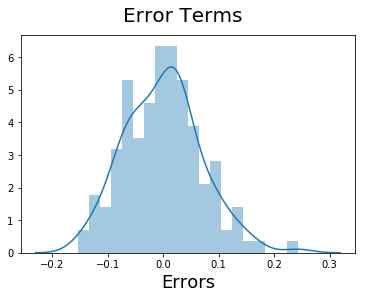

In [356]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

## Making Predictions Using the Final Model

** Applying the scaling on the test sets **

In [357]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_test.loc[:,'wheelbase':'price'] = scaler.transform(df_test.loc[:,'wheelbase':'price'])

df_test.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_d,aspiration_d,doornumber_d,enginelocation_d,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carfuelsystem_2bbl,carfuelsystem_4bbl,carfuelsystem_idi,carfuelsystem_mfi,carfuelsystem_mpfi,carfuelsystem_spdi,carfuelsystem_spfi
160,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811,0.072382,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
186,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0.093295,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
59,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405,0.102964,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.115479,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
140,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378,0.068652,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [358]:
df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_d,aspiration_d,doornumber_d,enginelocation_d,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carfuelsystem_2bbl,carfuelsystem_4bbl,carfuelsystem_idi,carfuelsystem_mfi,carfuelsystem_mpfi,carfuelsystem_spdi,carfuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,0.887097,0.822581,0.435484,0.967742,0.032258,0.032258,0.048387,0.0,0.048387,0.064516,0.016129,0.0,0.064516,0.016129,0.064516,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645,0.145161,0.274194,0.177419,0.241935,0.145161,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,0.319058,0.385142,0.499868,0.178127,0.178127,0.178127,0.216335,0.0,0.216335,0.247676,0.127000,0.0,0.247676,0.127000,0.247676,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512,0.355139,0.449749,0.385142,0.431751,0.355139,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387931,

** Dividing into X_test and y_test **

In [359]:
y_test = df_test.pop('price')
X_test = df_test

In [360]:
X.columns

Index(['carwidth', 'enginesize', 'enginelocation_d', 'company_bmw',
       'cylindernumber_three', 'cylindernumber_two'],
      dtype='object')

In [361]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['carwidth', 'enginesize', 'enginelocation_d', 'company_bmw','cylindernumber_three', 'cylindernumber_two']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [362]:
y_pred = lr_5.predict(X_test_new)
y_pred.head()

160    0.068476
186    0.142788
59     0.218485
165    0.052309
140    0.071365
dtype: float64

In [363]:
y_test.head()

160    0.072382
186    0.093295
59     0.102964
165    0.115479
140    0.068652
Name: price, dtype: float64

## Model Evaluation :

Let's now plot the graph for actual versus predicted values.

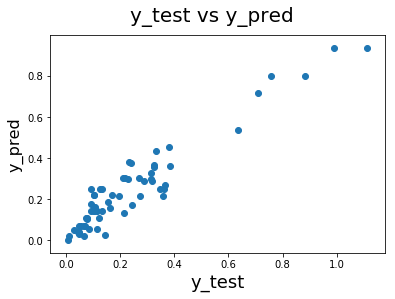

In [364]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

** Calculate R-squared score and RMSE on the test set.** 

In [365]:
from sklearn.metrics import r2_score
print("R-Squared Score : {}".format(r2_score(y_test, y_pred)))

R-Squared Score : 0.901344352281686


In [366]:
from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Root Mean Squared Error: 0.07261522038967089


## Conclusion :

We can see that the equation of our best fitted line is:

$ price = 0.4850  \times  carwidth + 0.7192  \times  enginesize - 0.4454 \times enginelocation + 0.0246 \times companybmw + 0.1986 \times cylindernumberthree + 0.1665 \times cylindernumbertwo $


**Addressing Goals of Analysis and Suggestions:**

[1] Which Variables are significant in predicting the price of a car?

From out final prediction model we have identified that carwidth,enginelocation,enginesize,companybmw,cylindernumber two/three are significant in predicting the price of the car.<br>

From this regression model it is clear that the price of the vehicle is not entirely dependedent on the parameters of the vehicle but rather the brand of the vehicles severly impact the price.<br>

Geely Auto can now invest more time in studying the vehicles and the price point of vehicles from each of these significant car companies and decide their business stratergy.<br>

[2] How well these variables describe the price of the car?

From the evaluation_rsquare when the aforementioned significant variables were used to predict the price of the testing dataset. It could account for 90.1% of the variability in the price. This is a good model.

[3] Build a regression model to understand the pricing dynamics of automobiles in the American Market. This will be used to drive business decisions and the car design to cater to specific price levels. 

The built and evaluated model is lr_5.

## Extra: Manual Feature Selection and Model Building

From EDA we had identified a lot of variables which has good correlation with price. We will do a manual feature selection and build a regression model in this step.

In [367]:
num_vars = ['company_bmw', 'company_buick', 'company_jaguar', 'company_porsche', 'enginelocation_d','curbweight','horsepower',
            'carwidth']

In [368]:
# Creating X_test dataframe with RFE selected variables
X_train_manual = X_train[num_vars]
X_train_manual.head()

,company_bmw,company_buick,company_jaguar,company_porsche,enginelocation_d,curbweight,horsepower,carwidth
122,0,0,0,0,1,0.272692,0.083333,0.291667
125,0,0,0,1,1,0.500388,0.395833,0.666667
166,0,0,0,0,1,0.314973,0.266667,0.308333
1,0,0,0,0,1,0.411171,0.262500,0.316667
199,0,0,0,0,1,0.647401,0.475000,0.575000


In [369]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_manual = sm.add_constant(X_train_manual)

In [370]:
lm = sm.OLS(y_train,X_train_lm_manual).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     206.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.03e-71
Time:                        21:34:05   Log-Likelihood:                 202.05
No. Observations:                 143   AIC:                            -386.1
Df Residuals:                     134   BIC:                            -359.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2513      0.076  

In [371]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_manual.columns
vif['VIF'] = [variance_inflation_factor(X_train_manual.values, i) for i in range(X_train_manual.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,carwidth,36.38
5,curbweight,31.72
6,horsepower,10.07
4,enginelocation_d,9.60
3,company_porsche,1.51
1,company_buick,1.45
2,company_jaguar,1.38
0,company_bmw,1.16


Drop column carwidth having high VIF value

In [372]:
X_train_manual = X_train_manual.drop('carwidth', 1,)
X_train_manual.head()

,company_bmw,company_buick,company_jaguar,company_porsche,enginelocation_d,curbweight,horsepower
122,0,0,0,0,1,0.272692,0.083333
125,0,0,0,1,1,0.500388,0.395833
166,0,0,0,0,1,0.314973,0.266667
1,0,0,0,0,1,0.411171,0.262500
199,0,0,0,0,1,0.647401,0.475000


In [373]:
X_train_lm_manual = sm.add_constant(X_train_manual)
lr_2 = sm.OLS(y_train, X_train_lm_manual).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     201.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.07e-68
Time:                        21:34:05   Log-Likelihood:                 191.33
No. Observations:                 143   AIC:                            -366.7
Df Residuals:                     135   BIC:                            -343.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1936      0.081  

In [374]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_manual.columns
vif['VIF'] = [variance_inflation_factor(X_train_manual.values, i) for i in range(X_train_manual.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,curbweight,16.26
6,horsepower,10.00
4,enginelocation_d,5.96
3,company_porsche,1.46
1,company_buick,1.40
2,company_jaguar,1.35
0,company_bmw,1.14


In [375]:
X_train_manual = X_train_manual.drop('curbweight', 1,)
X_train_manual.head()

,company_bmw,company_buick,company_jaguar,company_porsche,enginelocation_d,horsepower
122,0,0,0,0,1,0.083333
125,0,0,0,1,1,0.395833
166,0,0,0,0,1,0.266667
1,0,0,0,0,1,0.262500
199,0,0,0,0,1,0.475000


In [376]:
X_train_lm_manual = sm.add_constant(X_train_manual)
lr_3 = sm.OLS(y_train, X_train_lm_manual).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     128.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.98e-53
Time:                        21:34:06   Log-Likelihood:                 152.40
No. Observations:                 143   AIC:                            -290.8
Df Residuals:                     136   BIC:                            -270.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2392      0.105  

In [377]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_manual.columns
vif['VIF'] = [variance_inflation_factor(X_train_manual.values, i) for i in range(X_train_manual.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,horsepower,4.77
4,enginelocation_d,3.36
3,company_porsche,1.41
2,company_jaguar,1.29
0,company_bmw,1.13
1,company_buick,1.10


In [378]:
X_train_manual = X_train_manual.drop('company_porsche', 1,)
X_train_manual.head()

,company_bmw,company_buick,company_jaguar,enginelocation_d,horsepower
122,0,0,0,1,0.083333
125,0,0,0,1,0.395833
166,0,0,0,1,0.266667
1,0,0,0,1,0.262500
199,0,0,0,1,0.475000


In [379]:
X_train_lm_manual = sm.add_constant(X_train_manual)
lr_4 = sm.OLS(y_train, X_train_lm_manual).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.20e-54
Time:                        21:34:06   Log-Likelihood:                 152.01
No. Observations:                 143   AIC:                            -292.0
Df Residuals:                     137   BIC:                            -274.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2839      0.092  

In [380]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_manual.columns
vif['VIF'] = [variance_inflation_factor(X_train_manual.values, i) for i in range(X_train_manual.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,horsepower,3.43
3,enginelocation_d,2.87
2,company_jaguar,1.21
0,company_bmw,1.10
1,company_buick,1.08


In [381]:
y_train_price = lr_4.predict(X_train_lm_manual)

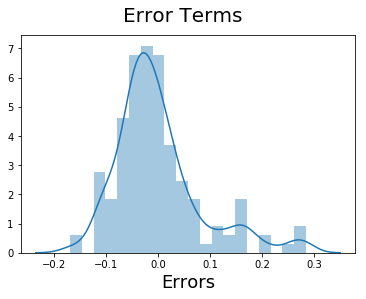

In [382]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [383]:
X_train_manual.columns

Index(['company_bmw', 'company_buick', 'company_jaguar', 'enginelocation_d',
       'horsepower'],
      dtype='object')

In [384]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_manual = X_test[['company_bmw', 'company_buick', 'company_jaguar', 'enginelocation_d','horsepower']]

# Adding a constant variable 
X_test_manual_new = sm.add_constant(X_test_manual)

In [385]:
y_pred_manual = lr_4.predict(X_test_manual_new)
y_pred_manual.head()

160    0.078239
186    0.126799
59     0.123562
165    0.214207
140    0.087951
dtype: float64

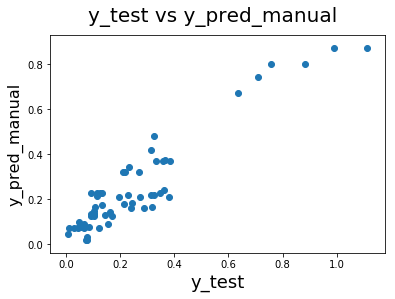

In [386]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_manual)
fig.suptitle('y_test vs y_pred_manual', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_manual', fontsize=16)                          # Y-label
plt.show()

In [387]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_manual)

0.8798820751230384

In [388]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred_manual))

0.080125470750813388